# PR #1B: Multiple Linear Regression 

NRP : 2372061
Nama : Laura Puspa Ameliana

Anda akan menggunakan dataset penilaian _real estate_. The dataset has the following attributes, among others:
1. _Transaction date_ $\Rightarrow$ for example, 2013.250=2013 March, 2013.500=2013 June
2. _House age_ (tahun)
3. _Distance to the nearest MRT station_ (meter)
4. _Number of convenience stores_   
5. _Latitude_ (derajat)
6. _Longitude_ (derajat)
7. _House price of unit area_ (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 $\text{meter}^2$)

Mari kita import dataset-nya.

In [1]:
import pandas as pd

In [2]:
real_estate = pd.read_excel("real-estate-valuation.xlsx")

In [3]:
real_estate.columns = [ "No", "transaction_date", "house_age", "distance", "convenience_stores", 
                        "latitude", "longitude", "house_price"]

In [4]:
real_estate.head()

,No,transaction_date,house_age,distance,convenience_stores,latitude,longitude,house_price
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


## Correlation
Tentukan korelasi antara _house price of unit area_ dengan _transaction date_ dan _house age_.    

In [6]:
print(real_estate['house_price'].corr(real_estate['house_age']))

-0.2105670462772168


In [8]:
print(real_estate['house_price'].corr(real_estate['transaction_date']))

0.08752927169725978


In [10]:
corr_with_house_price = real_estate[["transaction_date", "house_age", "house_price"]].corr()
print(corr_with_house_price)

                  transaction_date  house_age  house_price
transaction_date          1.000000   0.017542     0.087529
house_age                 0.017542   1.000000    -0.210567
house_price               0.087529  -0.210567     1.000000


## Visualization
Visualisasikan korelasi di atas dalam _scatterplot_.

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'House Price (per unit area)')

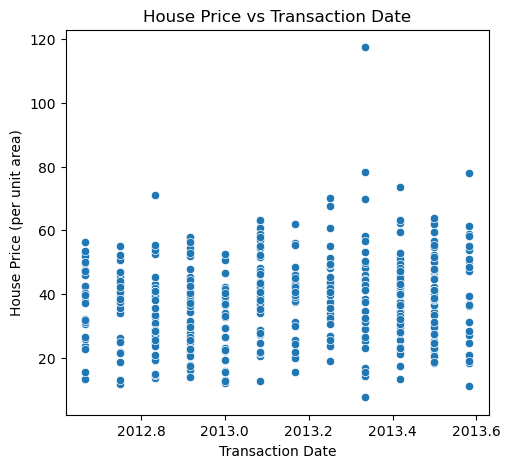

In [16]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.scatterplot(x="transaction_date", y="house_price", data=real_estate)
plt.title("House Price vs Transaction Date")
plt.xlabel("Transaction Date")
plt.ylabel("House Price (per unit area)")

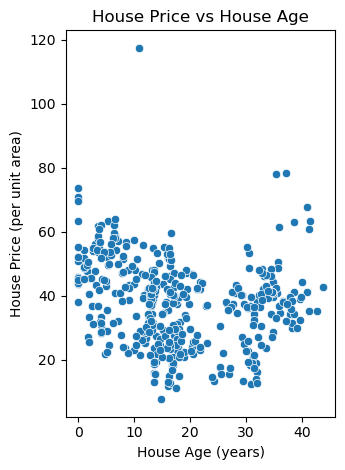

In [18]:

plt.subplot(1,2,2)
sns.scatterplot(x="house_age", y="house_price", data=real_estate)
plt.title("House Price vs House Age")
plt.xlabel("House Age (years)")
plt.ylabel("House Price (per unit area)")

plt.tight_layout()
plt.show()

## Model Regresi
- Buatlah model regresi untuk memprediksi house price of unit area dengan menggunakan semua attributes/features di dataset.
- Menurut pendapat Anda, apakah model ini _good enough_? Mengapa? 

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [20]:
X = real_estate[["transaction_date", "house_age", "distance", 
                 "convenience_stores", "latitude", "longitude"]]
y = real_estate["house_price"]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [23]:
y_pred = model.predict(X_test)


In [24]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [25]:
print("RMSE:", rmse)
print("R² Score:", r2)

RMSE: 7.314523385783985
R² Score: 0.6810781244679188


<center><h1>The End</h1></center>
